In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tqdm import tqdm

In [4]:
data= pd.read_csv('train/train.csv',  nrows=4000000)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 244.1+ MB


In [6]:
data.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [7]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.000000e+06,4.000000e+06,4.000000e+06,3.999971e+06,3.999971e+06,4.000000e+06
mean,1.134395e+01,-7.250844e+01,3.991910e+01,-7.250871e+01,3.991789e+01,1.684334e+00
std,9.824543e+00,1.312180e+01,8.797868e+00,1.289308e+01,9.716855e+00,1.329071e+00
min,-6.200000e+01,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076711e+01,-7.396366e+01,4.076812e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,2.912465e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [8]:
data.shape

(4000000, 8)

In [9]:
data.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    29
dropoff_latitude     29
passenger_count       0
dtype: int64

In [10]:
data.isnull().sum().sort_index()/len(data)*100

dropoff_latitude     0.000725
dropoff_longitude    0.000725
fare_amount          0.000000
key                  0.000000
passenger_count      0.000000
pickup_datetime      0.000000
pickup_latitude      0.000000
pickup_longitude     0.000000
dtype: float64

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
data[data.duplicated()].any()

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

In [14]:
data.shape

(3999971, 8)

In [15]:
df=data.copy()

In [16]:
data['fare_amount'][data['fare_amount']<0] = 0.1
data[data['fare_amount']<0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [17]:
df['passenger_count'][df['passenger_count']<0] = 0.1
df[df['fare_amount']<0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
...,...,...,...,...,...,...,...,...
3902021,2010-03-12 21:11:10.0000006,-32.9,2010-03-12 21:11:10 UTC,-73.959897,40.781325,-74.028200,40.639762,2
3957145,2015-02-22 19:22:50.0000004,-2.5,2015-02-22 19:22:50 UTC,0.000000,0.000000,0.000000,0.000000,5
3958037,2010-03-17 07:40:10.0000001,-6.5,2010-03-17 07:40:10 UTC,-73.975275,40.756862,-73.981203,40.747413,1
3973260,2015-01-04 13:49:01.0000004,-2.5,2015-01-04 13:49:01 UTC,-73.937782,40.758263,0.000000,0.000000,1


In [18]:
df['passenger_count'][df['passenger_count']>4] = 0.1
df[df['fare_amount']>4]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...,...
3999995,2014-03-24 07:33:57.0000002,46.83,2014-03-24 07:33:57 UTC,-73.987998,40.763007,-73.864281,40.769958,1.0
3999996,2014-11-08 17:02:00.000000153,14.00,2014-11-08 17:02:00 UTC,-74.007965,40.740327,-73.990090,40.756777,2.0
3999997,2009-05-17 00:23:31.0000004,11.30,2009-05-17 00:23:31 UTC,-73.964203,40.764695,-73.983850,40.727210,1.0
3999998,2009-08-25 06:48:17.0000001,4.50,2009-08-25 06:48:17 UTC,-74.003833,40.707497,-74.004392,40.716065,1.0


In [19]:
df['fare_amount'][df['fare_amount']>500] = 0.1
df[df['fare_amount']>500]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [20]:
print (" Maximum values\n")
print (df.max())
print (" \nMinimum values\n")
print (df.min())

 Maximum values

key                  2015-06-30 23:59:03.0000004
fare_amount                                500.0
pickup_datetime          2015-06-30 23:59:03 UTC
pickup_longitude                     3439.425565
pickup_latitude                      2912.464657
dropoff_longitude                     3457.62235
dropoff_latitude                     3345.917353
passenger_count                              4.0
dtype: object
 
Minimum values

key                  2009-01-01 00:00:46.0000002
fare_amount                                -62.0
pickup_datetime          2009-01-01 00:00:46 UTC
pickup_longitude                     -3426.60895
pickup_latitude                     -3488.079513
dropoff_longitude                   -3412.653087
dropoff_latitude                    -3488.079513
passenger_count                              0.0
dtype: object


In [21]:
df.shape

(3999971, 8)

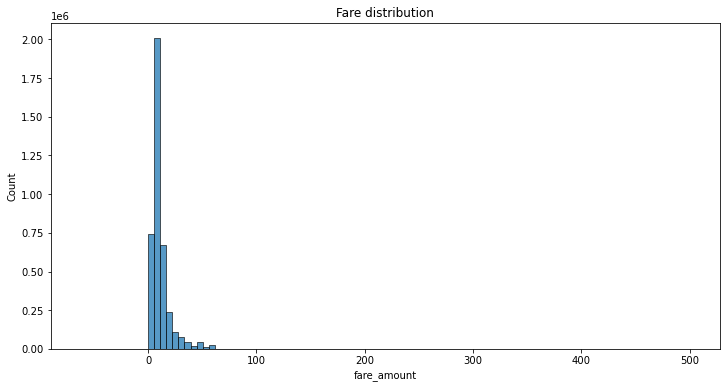

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="fare_amount", bins=100)
plt.title("Fare distribution")
plt.show()

### WORK ON TIME 

In [23]:
df['pickup_datetime']

0          2009-06-15 17:26:21 UTC
1          2010-01-05 16:52:16 UTC
2          2011-08-18 00:35:00 UTC
3          2012-04-21 04:30:42 UTC
4          2010-03-09 07:51:00 UTC
                    ...           
3999995    2014-03-24 07:33:57 UTC
3999996    2014-11-08 17:02:00 UTC
3999997    2009-05-17 00:23:31 UTC
3999998    2009-08-25 06:48:17 UTC
3999999    2011-10-21 21:01:43 UTC
Name: pickup_datetime, Length: 3999971, dtype: object

In [24]:
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999971 entries, 0 to 3999999
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 274.7+ MB


In [26]:
df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df.loc[:, 'pickup_date'] =df['pickup_datetime'].dt.day
df.loc[:, 'pickup_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pickup_day'] = df['pickup_datetime'].dt.dayofweek
df.loc[:, 'pickup_year'] = df['pickup_datetime'].dt.year

In [27]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,17,Monday,15,6,0,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16,Tuesday,5,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0,Thursday,18,8,3,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,4,Saturday,21,4,5,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,7,Tuesday,9,3,1,2010


# WORK ON DISTANCE

In [28]:
df.drop(df.index[(df.pickup_longitude < -75) | 
           (df.pickup_longitude > -72) | 
           (df.pickup_latitude < 40) | 
           (df.pickup_latitude > 42)],inplace=True)
df.drop(df.index[(df.dropoff_longitude < -75) | 
           (df.dropoff_longitude > -72) | 
           (df.dropoff_latitude < 40) | 
           (df.dropoff_latitude > 42)],inplace=True)

In [29]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,17,Monday,15,6,0,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16,Tuesday,5,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0,Thursday,18,8,3,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,4,Saturday,21,4,5,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,7,Tuesday,9,3,1,2010


In [30]:
# Haversine formula
def calc_distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295  # pi / 180
    a = 0.5 - np.cos((lat2 - lat1) * p) / 2 + \
        np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [31]:
df["distance"] = calc_distance(
   df["pickup_latitude"],  df["pickup_longitude"], 
   df["dropoff_latitude"], df["dropoff_longitude"]
)

In [32]:
df.distance.describe()

count    3.915820e+06
mean     2.069754e+00
std      2.360636e+00
min      0.000000e+00
25%      7.789048e-01
50%      1.337475e+00
75%      2.430053e+00
max      1.004671e+02
Name: distance, dtype: float64

In [33]:
df = df.drop(df[df["distance"] < 0.05].index)

In [34]:
df.distance.describe()

count    3.852893e+06
mean     2.103478e+00
std      2.364918e+00
min      5.000110e-02
25%      8.019971e-01
50%      1.359916e+00
75%      2.459504e+00
max      1.004671e+02
Name: distance, dtype: float64

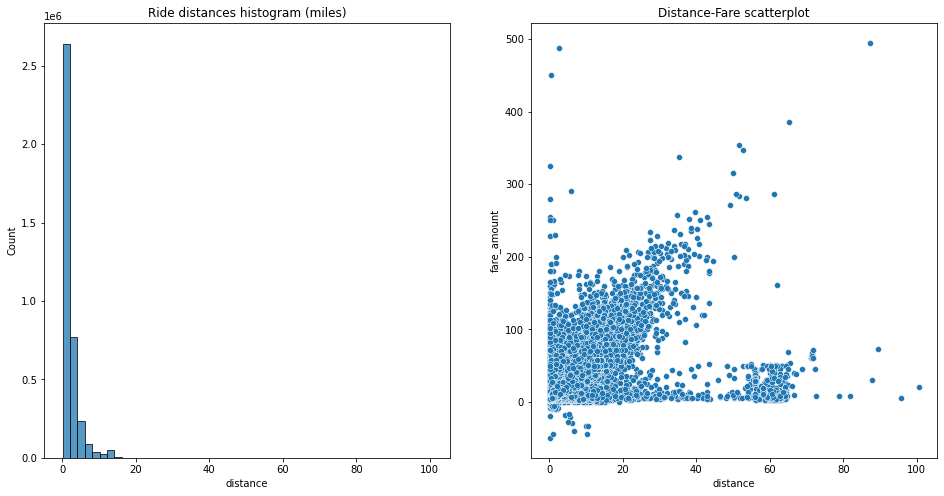

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(data=df, x="distance", bins=50, ax=axs[0])
axs[0].set_title("Ride distances histogram (miles)")
sns.scatterplot(data=df, x="distance", y="fare_amount", alpha=1, ax=axs[1])
axs[1].set_title("Distance-Fare scatterplot")
plt.show()

In [36]:
df["fare_mile"] = df["fare_amount"] / df["distance"]

In [37]:
df.fare_mile.describe()

count    3.852893e+06
mean     7.420894e+00
std      1.226790e+01
min     -4.243850e+02
25%      4.767371e+00
50%      6.132348e+00
75%      8.085777e+00
max      3.812572e+03
Name: fare_mile, dtype: float64

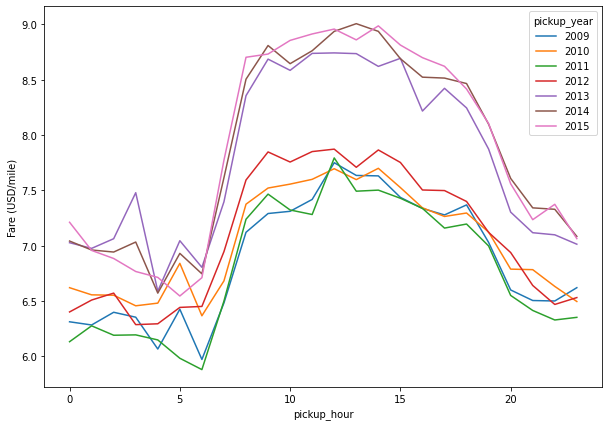

In [38]:
df.pivot_table("fare_mile", index="pickup_hour", columns="pickup_year").plot(figsize=(10, 7))
plt.ylabel('Fare (USD/mile)')
plt.show()

In [39]:
df =df.drop("fare_mile", axis=1)

In [ ]:
plt.figure(figsize = (14,8))
sb.heatmap(df.drop(['key', 'pickup_datetime','pickup_weekday'], axis = 1).corr(), 
           cmap ='BuGn', annot = True);

### Passenger nos

# Feature Engineering

In [40]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_hour', 'pickup_weekday', 'pickup_date',
       'pickup_month', 'pickup_day', 'pickup_year', 'distance'],
      dtype='object')

In [41]:
col = [
    "pickup_datetime",'pickup_weekday','key'
]

for x in [df]:
    x.drop(col, axis=1, inplace=True)

In [42]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_hour', 'pickup_date', 'pickup_month', 'pickup_day',
       'pickup_year', 'distance'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [44]:
X, y = df.drop('fare_amount', axis = 1), df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [45]:
print ('Training data input features:\n\n', X.columns.T)
#print ('Training data output features:', y.columns)

Training data input features:

 Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hour', 'pickup_date',
       'pickup_month', 'pickup_day', 'pickup_year', 'distance'],
      dtype='object')


In [46]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [47]:
print ('size of train data:', X_train.shape)
print ('size of test data:', X_test.shape)

size of train data: (3082314, 11)
size of test data: (770579, 11)


In [48]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit_transform(X_train,X_test)

array([[-3.18139894e-01, -1.06423884e+00, -6.66111146e-01, ...,
        -5.34156608e-01, -1.47155406e+00, -1.94109094e-01],
       [-1.91770569e-01, -4.08800360e-01, -4.25184625e-01, ...,
         4.91654674e-01, -3.98479767e-01, -7.27549149e-01],
       [-6.86439235e-01,  3.79202721e-01, -1.51837762e-01, ...,
         1.00456032e+00,  1.38057380e-01, -3.76710517e-01],
       ...,
       [-9.53959874e-01, -1.03149010e+00, -8.61375213e-01, ...,
        -1.55996789e+00, -1.47155406e+00, -1.63897046e-02],
       [ 1.20105922e-03,  4.77912214e-02, -3.19647279e-01, ...,
        -5.34156608e-01, -9.35016914e-01, -5.06614716e-01],
       [ 1.07675829e-01,  2.49099628e-01, -1.21386613e-01, ...,
         4.91654674e-01,  1.38057380e-01, -7.20905838e-01]])

# MODELLING

In [53]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 400, seed = 123)

In [ ]:
xgb_r.fit(X_train,y_train)

[13:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [81]:
y_pred1 = xgb_r.predict(X_test)

In [82]:
rmse = np.sqrt(MSE(y_test, y_pred1))
print("RMSE : % f" %(rmse))

RMSE :  3.115822


In [83]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred2 = lr.predict(X_test)
rmse = np.sqrt(MSE(y_pred2, y_test))
print("RMSE: ", rmse)

RMSE:  4.867332289040037


In [ ]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

In [ ]:
y_pred3 = svr_reg.predict(X_test)
svr_reg = np.sqrt(y_test, y_pred3)
print('RMSE:',svr_reg)


In [87]:
rf = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)
rf.fit(X_train,y_train.values.ravel())

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [88]:
y_pred4 = rf.predict(X_test)
rmse = np.sqrt(MSE(y_pred4, y_test))
print("RMSE: ", rmse)

RMSE:  3.470477279745758
